In [4]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Question 1: Signification des transactions
itemset = ['A', 'B', 'C', 'D', 'E', 'F']
transactions = ['AB', 'ABCD', 'ABD', 'ABDF', 'ACDE', 'BCDF']

# Affichage des transactions
for i, transaction in enumerate(transactions, start=1):
    print(f"Transaction {i}: {transaction}")

# Question 2: Challenges de l'encodage en one-hot et utilité de TransactionEncoder
te = TransactionEncoder()
one_hot_encoded = te.fit_transform([list(t) for t in transactions])

# Affichage de la transformation one-hot
df_one_hot = pd.DataFrame(one_hot_encoded, columns=te.columns_)
print("\nDataFrame encodé en one-hot:")
print(df_one_hot)

# Question 3: Avantages de la transformation one-hot pour Apriori
print("\nAvantages de la transformation one-hot:")
print("La représentation des transactions change en remplaçant chaque élément par une colonne binaire.")
print("Cela permet d'appliquer l'algorithme Apriori, qui fonctionne mieux avec des données binaires.")

# Question 4: Ajustement des paramètres dans Apriori
support_values = [0.1, 0.2, 0.3, 0.4]
for support_value in support_values:
    frequent_itemsets = apriori(df_one_hot, min_support=support_value, use_colnames=True)
    print(f"\nEnsembles d'articles fréquents avec un support minimum de {support_value}:")
    print(frequent_itemsets)

# Question 5: Analyse des ensembles d'articles fréquents
print("\nAnalyse des ensembles d'articles fréquents:")
print("Les ensembles d'articles fréquents peuvent révéler quels articles sont souvent achetés ensemble.")
print("Cela peut être utile pour la gestion des stocks, le placement de produits et les stratégies de marketing.")

# Question 6: Métriques des règles d'association
confidence_lift_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
print("\nRègles d'association avec métrique de confiance:")
print(confidence_lift_rules)

print("\nAnalyse des métriques de confiance et de lift:")
print("La confiance mesure la probabilité conditionnelle de la conclusion sachant la prémisse.")
print("Le lift mesure la force d'une règle par rapport à une situation où les antécédents et les conséquents sont indépendants.")


Transaction 1: AB
Transaction 2: ABCD
Transaction 3: ABD
Transaction 4: ABDF
Transaction 5: ACDE
Transaction 6: BCDF

DataFrame encodé en one-hot:
       A      B      C      D      E      F
0   True   True  False  False  False  False
1   True   True   True   True  False  False
2   True   True  False   True  False  False
3   True   True  False   True  False   True
4   True  False   True   True   True  False
5  False   True   True   True  False   True

Avantages de la transformation one-hot:
La représentation des transactions change en remplaçant chaque élément par une colonne binaire.
Cela permet d'appliquer l'algorithme Apriori, qui fonctionne mieux avec des données binaires.

Ensembles d'articles fréquents avec un support minimum de 0.1:
     support      itemsets
0   0.833333           (A)
1   0.833333           (B)
2   0.500000           (C)
3   0.833333           (D)
4   0.166667           (E)
5   0.333333           (F)
6   0.666667        (B, A)
7   0.333333        (C, A)
8   0.6

Précision du modèle : 1.00
Matrice de confusion :
 [[3 0]
 [0 1]]


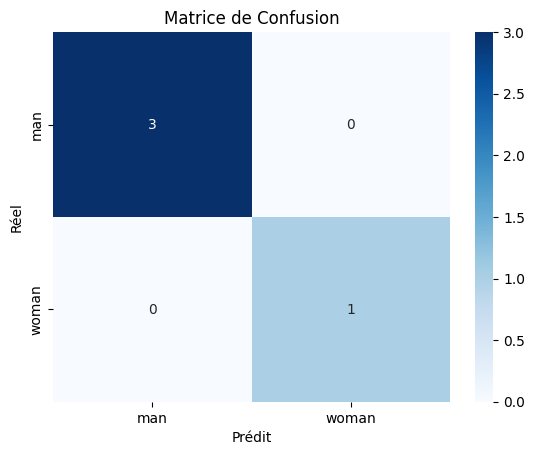

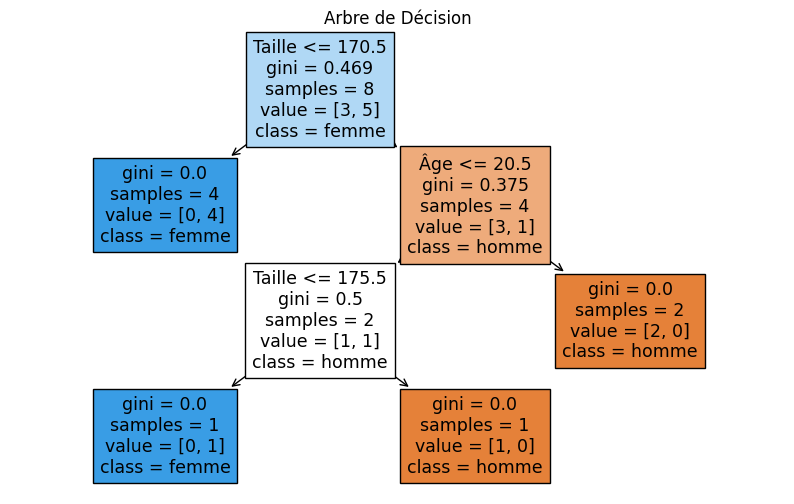

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Préparation des données
X = [[180, 15], [167, 42], [136, 35], [174, 65], [141, 28], [176, 15],
     [156, 25], [175, 18],[186, 25], [166, 36], [180, 18],[180, 23]]
y = ['man', 'woman', 'woman', 'man', 'woman', 'man', 'woman',
     'woman','man', 'woman', 'man','man']

# 2. Répartition train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Classificateur d'arbre de décision
clf = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=3)

# 4. Entraînement
clf.fit(X_train, y_train)

# 5. Prédiction
y_pred = clf.predict(X_test)

# 6. Calcul de précision
accuracy = accuracy_score(y_test, y_pred)
print(f'Précision du modèle : {accuracy:.2f}')

# 7. Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matrice de confusion :\n', conf_matrix)

# 8. Visualisation de la matrice de confusion
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

# 9. Visualisation de l'arbre de décision
plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=['Taille', 'Âge'], class_names=['homme', 'femme'], filled=True)
plt.title('Arbre de Décision')
plt.show()
